In [2]:
import pandas as pd
import json
from pandas import json_normalize

# 1. Open the file
with open('/content/drive/MyDrive/Conversational_Transcript_Dataset.json') as f:
    data = json.load(f)

# 2. Convert the 'transcripts' list into a flat DataFrame
df = json_normalize(data['transcripts'])

# View the result
df.head()

,transcript_id,time_of_interaction,domain,intent,reason_for_call,conversation
0,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,"[{'speaker': 'Agent', 'text': 'Hello, thank yo..."
1,7034-5430-2980-5483,2025-09-17 13:33:00,Healthcare Services,Escalation - Repeated Service Failures,Customer Jerry Chavez escalated to supervisor ...,"[{'speaker': 'Agent', 'text': 'Thank you for c..."
2,1846-5500-2990-8975,2025-04-24 15:31:00,Insurance,Fraud Alert Investigation,Customer Kyle Davis received fraud alert for u...,"[{'speaker': 'Agent', 'text': 'Thank you for c..."
3,1616-8531-3291-5075,2025-12-02 19:59:00,Banking & Finance,Fraud Alert Investigation,Customer Nancy Phillips received fraud alert f...,"[{'speaker': 'Agent', 'text': 'Thank you for c..."
4,7441-4348-3458-2384,2025-04-01 09:04:00,Telecommunications,Account Access Issues,Customer Nicholas Flores experienced access is...,"[{'speaker': 'Agent', 'text': 'Thank you for c..."


In [3]:
# This creates a row for every single speaker turn in the dataset
df_messages = df.explode('conversation').reset_index(drop=True)

# Now flatten the individual messages into columns (speaker, text)
df_flat_messages = json_normalize(df_messages['conversation'])

# Combine it with the original transcript info
final_df = pd.concat([df_messages.drop(columns='conversation'), df_flat_messages], axis=1)
final_df.head()

,transcript_id,time_of_interaction,domain,intent,reason_for_call,speaker,text
0,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Agent,"Hello, thank you for contacting BuyNow. This i..."
1,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Customer,"Hello, I'm calling about an order that shows d..."
2,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Agent,I'm sorry to hear that. I'll definitely help y...
3,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Customer,It's 9595912. The tracking was marked delivere...
4,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Agent,"Let me pull that up right away. Okay, I see th..."


In [4]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84465 entries, 0 to 84464
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   transcript_id        84465 non-null  object
 1   time_of_interaction  84465 non-null  object
 2   domain               84465 non-null  object
 3   intent               84465 non-null  object
 4   reason_for_call      84465 non-null  object
 5   speaker              84465 non-null  object
 6   text                 84465 non-null  object
dtypes: object(7)
memory usage: 4.5+ MB


In [5]:
final_df

,transcript_id,time_of_interaction,domain,intent,reason_for_call,speaker,text
0,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Agent,"Hello, thank you for contacting BuyNow. This i..."
1,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Customer,"Hello, I'm calling about an order that shows d..."
2,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Agent,I'm sorry to hear that. I'll definitely help y...
3,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Customer,It's 9595912. The tracking was marked delivere...
4,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Agent,"Let me pull that up right away. Okay, I see th..."
...,...,...,...,...,...,...,...
84460,5013-5906-1491-6772,2025-11-09 17:44:00,Technology Support,"Multiple Issues - Technical, Plan & Payment",Customer Margaret Williams reported WiFi cover...,Customer,"Yes, that's perfect. And I need to switch my p..."
84461,5013-5906-1491-6772,2025-11-09 17:44:00,Technology Support,"Multiple Issues - Technical, Plan & Payment",Customer Margaret Williams reported WiFi cover...,Agent,I can process both changes. The plan change ta...
84462,5013-5906-1491-6772,2025-11-09 17:44:00,Technology Support,"Multiple Issues - Technical, Plan & Payment",Customer Margaret Williams reported WiFi cover...,Customer,[Provides card ending in 2950]
84463,5013-5906-1491-6772,2025-11-09 17:44:00,Technology Support,"Multiple Issues - Technical, Plan & Payment",Customer Margaret Williams reported WiFi cover...,Agent,Updated. You'll save $33/month starting next c...


In [6]:
print("Value counts for 'domain' column:")
print(final_df['domain'].value_counts())
print("\nValue counts for 'intent' column:")
print(final_df['intent'].value_counts())
print("\nValue counts for 'speaker' column:")
print(final_df['speaker'].value_counts())

Value counts for 'domain' column:
domain
Healthcare Services     18479
Banking & Finance       12988
Telecommunications      11585
Insurance               11127
E-commerce & Retail     10933
Technology Support      10192
Travel & Hospitality     9161
Name: count, dtype: int64

Value counts for 'intent' column:
intent
Appointment Scheduling                                      9355
Escalation - Repeated Service Failures                      8430
Service Interruptions                                       6224
Account Access Issues                                       5824
Claim Denials                                               5430
Delivery Investigation                                      5385
Escalation - Threat of Legal Action                         4265
Fraud Alert Investigation                                   4250
Update Failures                                             4099
Reservation Modifications                                   2737
Multiple Issues - Returns & Acc

In [7]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Download necessary NLTK data (run once)
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize lemmatizer and stop words
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower() # Lowercasing
    text = re.sub(r'[^a-z\s]', '', text) # Remove punctuation and numbers (keep only letters and spaces)
    words = text.split() # Tokenization
    words = [word for word in words if word not in stop_words] # Stop word removal
    words = [lemmatizer.lemmatize(word) for word in words] # Lemmatization
    return ' '.join(words)

# Apply text cleaning to 'text' and 'reason_for_call' columns
# This creates new columns to preserve the original text
final_df['cleaned_text'] = final_df['text'].apply(clean_text)
final_df['cleaned_reason_for_call'] = final_df['reason_for_call'].apply(clean_text)

print("Original and cleaned text for a sample:")
print(final_df[['text', 'cleaned_text', 'reason_for_call', 'cleaned_reason_for_call']].sample(5))

# Convert 'time_of_interaction' to datetime and extract features
final_df['time_of_interaction'] = pd.to_datetime(final_df['time_of_interaction'])
final_df['hour_of_day'] = final_df['time_of_interaction'].dt.hour
final_df['day_of_week'] = final_df['time_of_interaction'].dt.day_name()
final_df['month'] = final_df['time_of_interaction'].dt.month_name()

print("\nSample with new temporal features:")
print(final_df[['time_of_interaction', 'hour_of_day', 'day_of_week', 'month']].sample(5))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


Original and cleaned text for a sample:
                                                    text  \
20925  Perfect. The installation should take about 2-...   
13067                  A massage, preferably 60 minutes.   
64822            No, that's everything. Thank you again.   
14045  What about my automatic payments? I have bills...   
17609           No, that's all. Thank you for your help.   

                                            cleaned_text  \
20925  perfect installation take minute done try laun...   
13067                          massage preferably minute   
64822                             thats everything thank   
14045                    automatic payment bill set card   
17609                                   thats thank help   

                                         reason_for_call  \
20925  Customer Jose Kelly experienced software crash...   
13067  Guest Edward King called to report a problem w...   
64822  Customer Brian Young contacted customer servic...  

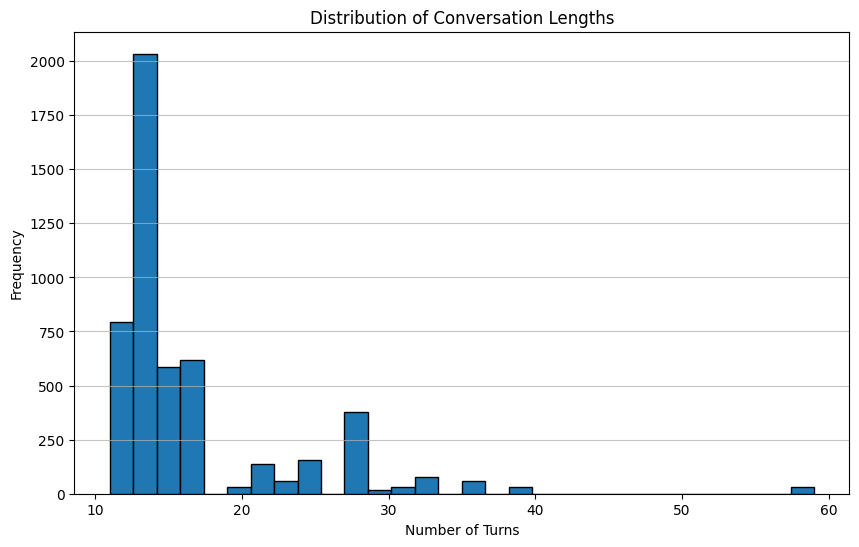

In [8]:
import matplotlib.pyplot as plt

# Calculate conversation lengths by grouping by transcript_id and counting messages
conversation_lengths = final_df.groupby('transcript_id').size()

# Create a histogram of conversation lengths
plt.figure(figsize=(10, 6))
plt.hist(conversation_lengths, bins=30, edgecolor='black')
plt.title('Distribution of Conversation Lengths')
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

In [9]:
final_df['text_length'] = final_df['text'].apply(len)
final_df.head()

,transcript_id,time_of_interaction,domain,intent,reason_for_call,speaker,text,cleaned_text,cleaned_reason_for_call,hour_of_day,day_of_week,month,text_length
0,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Agent,"Hello, thank you for contacting BuyNow. This i...",hello thank contacting buynow emma help,customer james bailey reported smart watch sho...,20,Friday,October,73
1,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Customer,"Hello, I'm calling about an order that shows d...",hello im calling order show delivered never re...,customer james bailey reported smart watch sho...,20,Friday,October,79
2,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Agent,I'm sorry to hear that. I'll definitely help y...,im sorry hear ill definitely help look get ord...,customer james bailey reported smart watch sho...,20,Friday,October,93
3,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Customer,It's 9595912. The tracking was marked delivere...,tracking marked delivered yesterday afternoon ...,customer james bailey reported smart watch sho...,20,Friday,October,102
4,6794-8660-4606-3216,2025-10-03 20:22:00,E-commerce & Retail,Delivery Investigation,Customer James Bailey reported a smart watch s...,Agent,"Let me pull that up right away. Okay, I see th...",let pull right away okay see order smart watch...,customer james bailey reported smart watch sho...,20,Friday,October,190


Average text length for Agent speakers: 135.49
Average text length for Customer speakers: 74.64


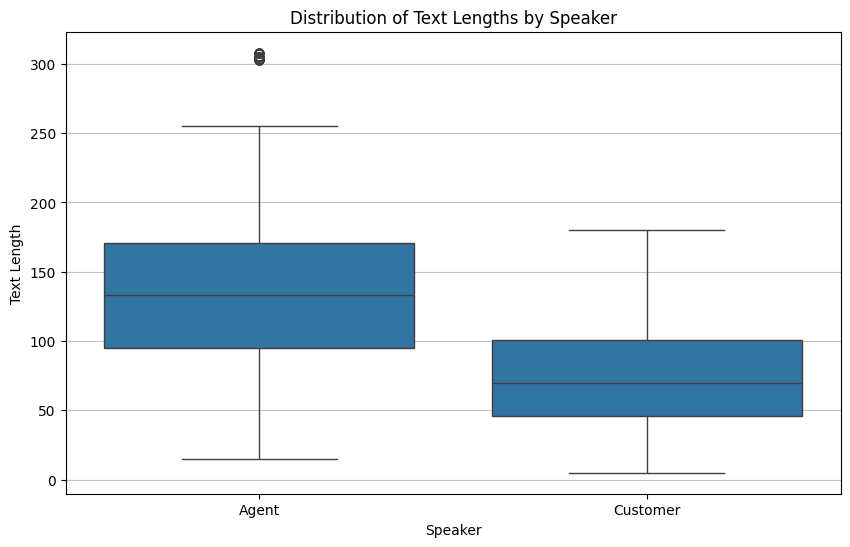

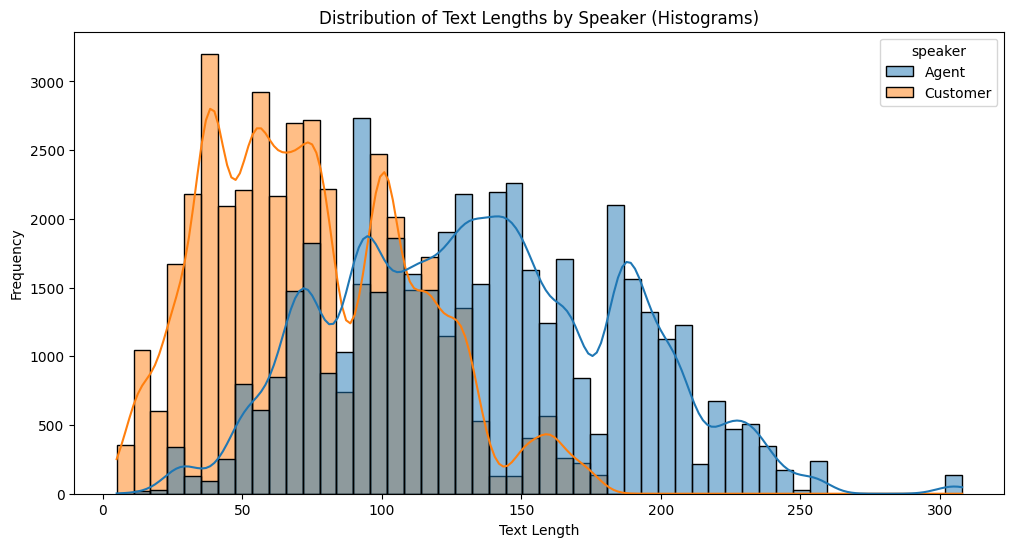

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average text length for Agent and Customer speakers
avg_text_length_agent = final_df[final_df['speaker'] == 'Agent']['text_length'].mean()
avg_text_length_customer = final_df[final_df['speaker'] == 'Customer']['text_length'].mean()

print(f"Average text length for Agent speakers: {avg_text_length_agent:.2f}")
print(f"Average text length for Customer speakers: {avg_text_length_customer:.2f}")

# Visualize the distribution of text lengths for Agent and Customer speakers using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(x='speaker', y='text_length', data=final_df)
plt.title('Distribution of Text Lengths by Speaker')
plt.xlabel('Speaker')
plt.ylabel('Text Length')
plt.grid(axis='y', alpha=0.75)
plt.show()

# Visualize the distribution of text lengths for Agent and Customer speakers using histograms
plt.figure(figsize=(12, 6))
sns.histplot(data=final_df, x='text_length', hue='speaker', kde=True, bins=50)
plt.title('Distribution of Text Lengths by Speaker (Histograms)')
plt.xlabel('Text Length')
plt.ylabel('Frequency')
plt.show()

In [11]:
print("Sample of 'reason_for_call' column:")
print(final_df['reason_for_call'].sample(n=10).tolist())

Sample of 'reason_for_call' column:
['Customer Patrick Moore experienced mobile data outage for three days due to cell tower damage, requiring service restoration timeline and temporary workaround solution.', 'Customer Jerry Mitchell received fraud alert for unauthorized $892.75 charge in Nevada, requiring card cancellation, transaction reversal, and new card issuance.', 'Customer Michael Ramirez extended reservation, reported air conditioning issue, and booked spa appointment.', 'Customer Virginia Sanchez experienced software crash after major update installation due to codec library compatibility issue, resolved with hotfix patch application.', 'Customer Betty Ramirez inquired about delayed order 2349348, duplicate charge issue, and requested email address update.', 'Customer William Moore called during a major regional network outage caused by fiber cable damage, affecting thousands of customers.', 'Patient Kenneth Evans arrived for a scheduled appointment that was not found in the 

/tmp/ipython-input-2571350685.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, y='domain', order=final_df['domain'].value_counts().index, palette='viridis')


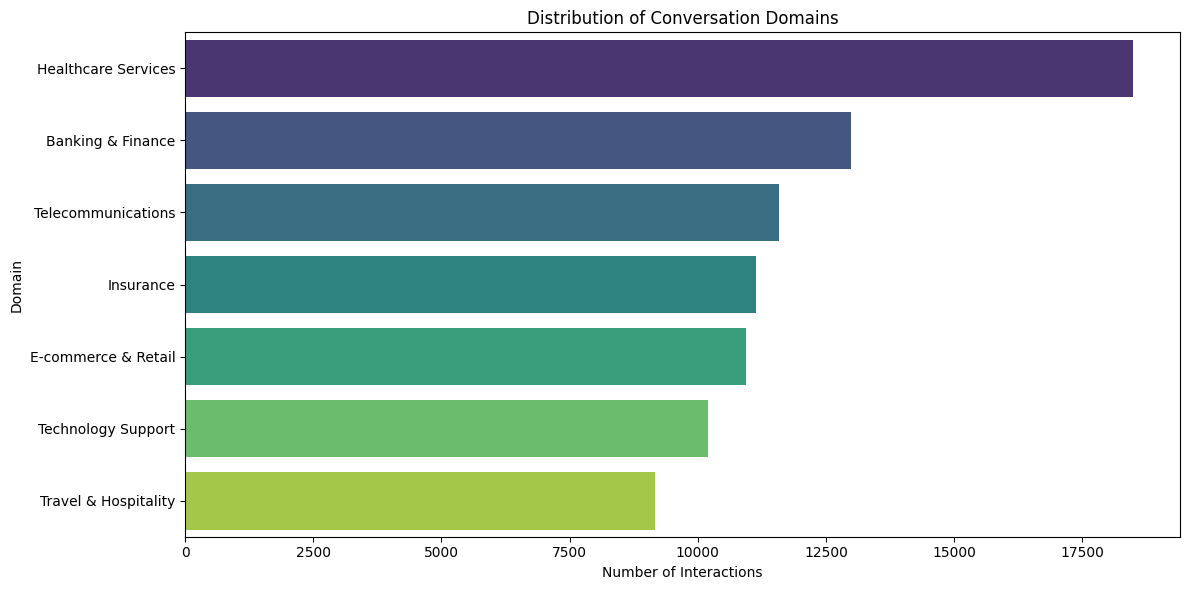

/tmp/ipython-input-2571350685.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_intents.values, y=top_intents.index, palette='plasma')


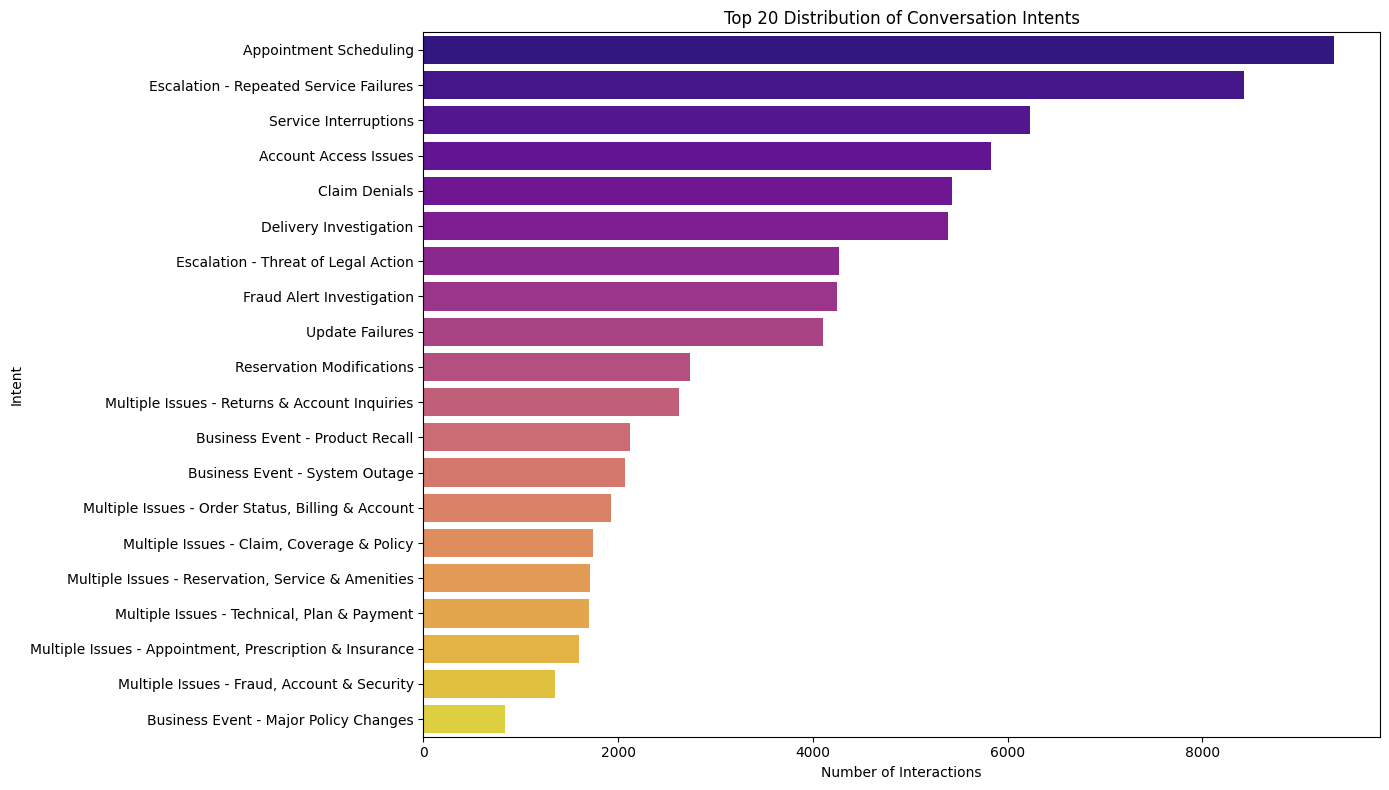

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar chart for 'domain' distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, y='domain', order=final_df['domain'].value_counts().index, palette='viridis')
plt.title('Distribution of Conversation Domains')
plt.xlabel('Number of Interactions')
plt.ylabel('Domain')
plt.tight_layout()
plt.show()

# 2. Bar chart for 'intent' distribution
# Get the value counts and decide on displaying top N if too many
intent_counts = final_df['intent'].value_counts()

# If there are too many unique intents, display only the top 20 for better readability
if len(intent_counts) > 20:
    top_intents = intent_counts.head(20)
    plt.figure(figsize=(14, 8))
    sns.barplot(x=top_intents.values, y=top_intents.index, palette='plasma')
    plt.title('Top 20 Distribution of Conversation Intents')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Intent')
else:
    plt.figure(figsize=(14, 8))
    sns.barplot(x=intent_counts.values, y=intent_counts.index, palette='plasma')
    plt.title('Distribution of Conversation Intents')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Intent')

plt.tight_layout()
plt.show()

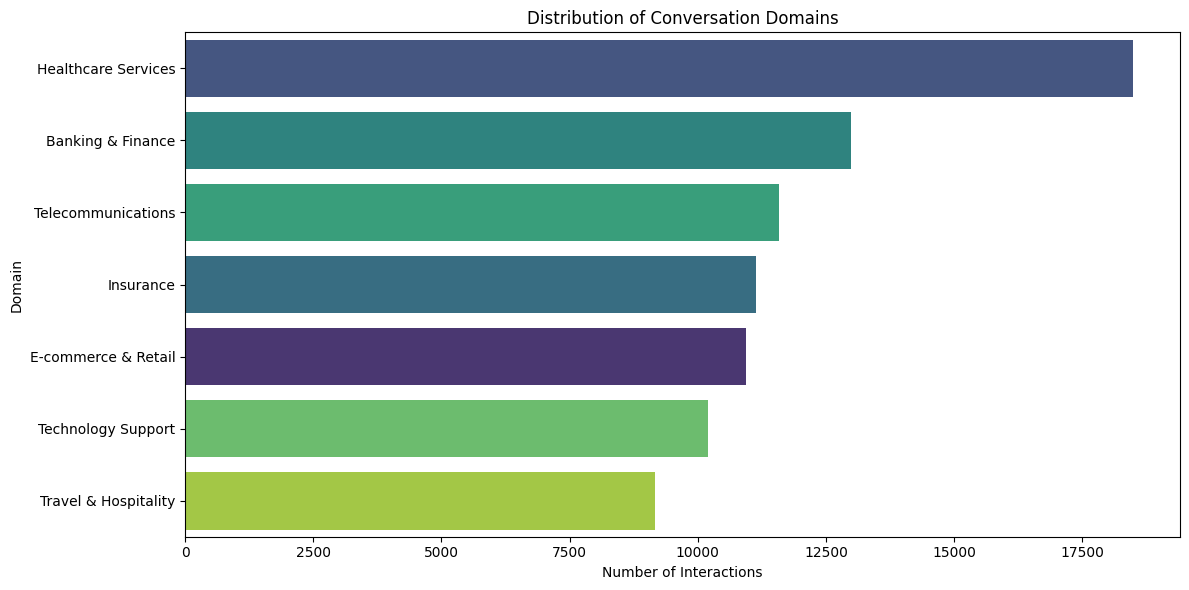

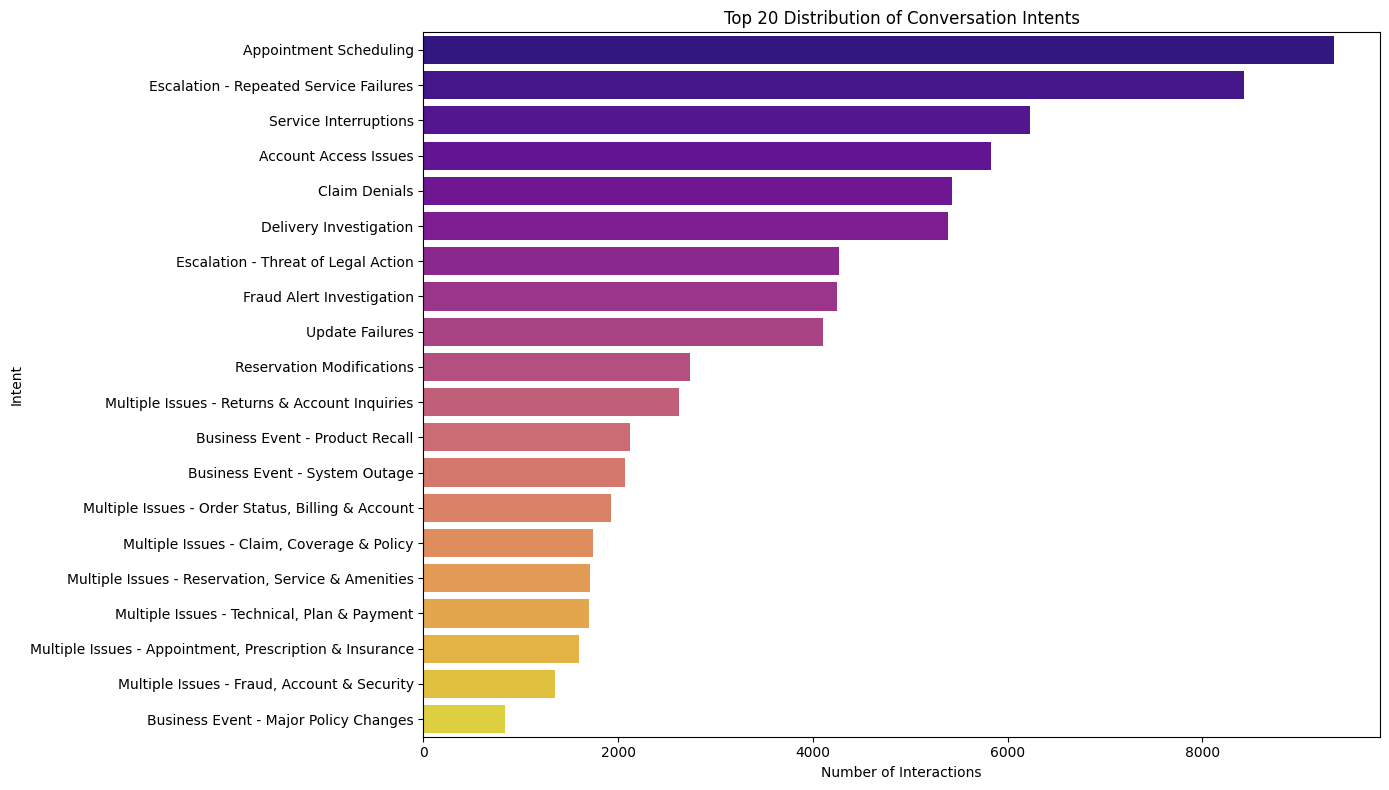

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Bar chart for 'domain' distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, y='domain', order=final_df['domain'].value_counts().index, hue='domain', palette='viridis', legend=False)
plt.title('Distribution of Conversation Domains')
plt.xlabel('Number of Interactions')
plt.ylabel('Domain')
plt.tight_layout()
plt.show()

# 2. Bar chart for 'intent' distribution
# Get the value counts and decide on displaying top N if too many
intent_counts = final_df['intent'].value_counts()

# If there are too many unique intents, display only the top 20 for better readability
if len(intent_counts) > 20:
    top_intents = intent_counts.head(20)
    plt.figure(figsize=(14, 8))
    # Create a temporary DataFrame for seaborn to correctly map hue
    temp_df_intent = pd.DataFrame({'Intent': top_intents.index, 'Count': top_intents.values})
    sns.barplot(x='Count', y='Intent', data=temp_df_intent, hue='Intent', palette='plasma', legend=False)
    plt.title('Top 20 Distribution of Conversation Intents')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Intent')
else:
    plt.figure(figsize=(14, 8))
    temp_df_intent = pd.DataFrame({'Intent': intent_counts.index, 'Count': intent_counts.values})
    sns.barplot(x='Count', y='Intent', data=temp_df_intent, hue='Intent', palette='plasma', legend=False)
    plt.title('Distribution of Conversation Intents')
    plt.xlabel('Number of Interactions')
    plt.ylabel('Intent')

plt.tight_layout()
plt.show()

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Create a new DataFrame 'conversation_details' with unique transcript_id, domain, and intent
conversation_details = final_df[['transcript_id', 'domain', 'intent']].drop_duplicates().set_index('transcript_id')

# 2. Merge the 'conversation_lengths' Series into 'conversation_details'
# conversation_lengths is already a Series with transcript_id as index and length as values
conversation_details = conversation_details.merge(conversation_lengths.rename('conversation_length'), left_index=True, right_index=True)

print("Conversation details with lengths:")
print(conversation_details.head())

Conversation details with lengths:
                                  domain  \
transcript_id                              
6794-8660-4606-3216  E-commerce & Retail   
7034-5430-2980-5483  Healthcare Services   
1846-5500-2990-8975            Insurance   
1616-8531-3291-5075    Banking & Finance   
7441-4348-3458-2384   Telecommunications   

                                                     intent  \
transcript_id                                                 
6794-8660-4606-3216                  Delivery Investigation   
7034-5430-2980-5483  Escalation - Repeated Service Failures   
1846-5500-2990-8975               Fraud Alert Investigation   
1616-8531-3291-5075               Fraud Alert Investigation   
7441-4348-3458-2384                   Account Access Issues   

                     conversation_length  
transcript_id                             
6794-8660-4606-3216                   15  
7034-5430-2980-5483                   17  
1846-5500-2990-8975                   14  

/tmp/ipython-input-1783260757.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='domain', y='conversation_length', data=conversation_details, palette='viridis')


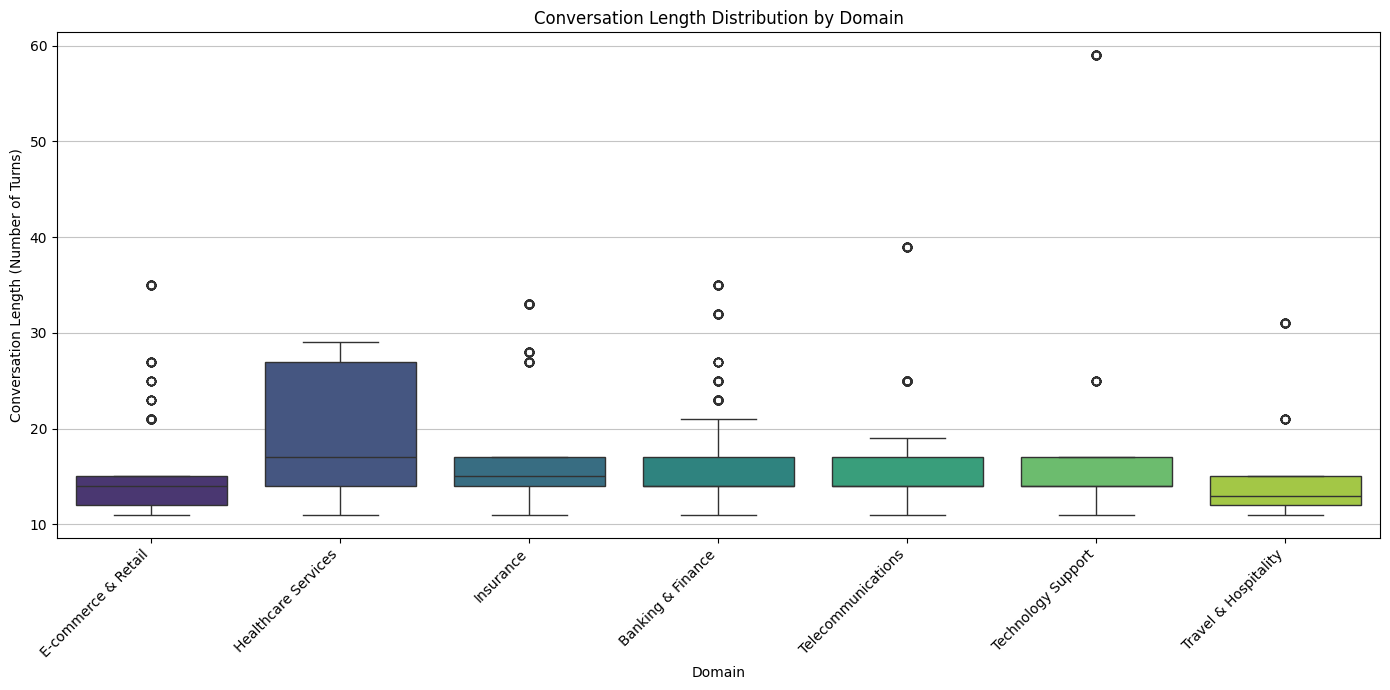

In [15]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='domain', y='conversation_length', data=conversation_details, palette='viridis')
plt.title('Conversation Length Distribution by Domain')
plt.xlabel('Domain')
plt.ylabel('Conversation Length (Number of Turns)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

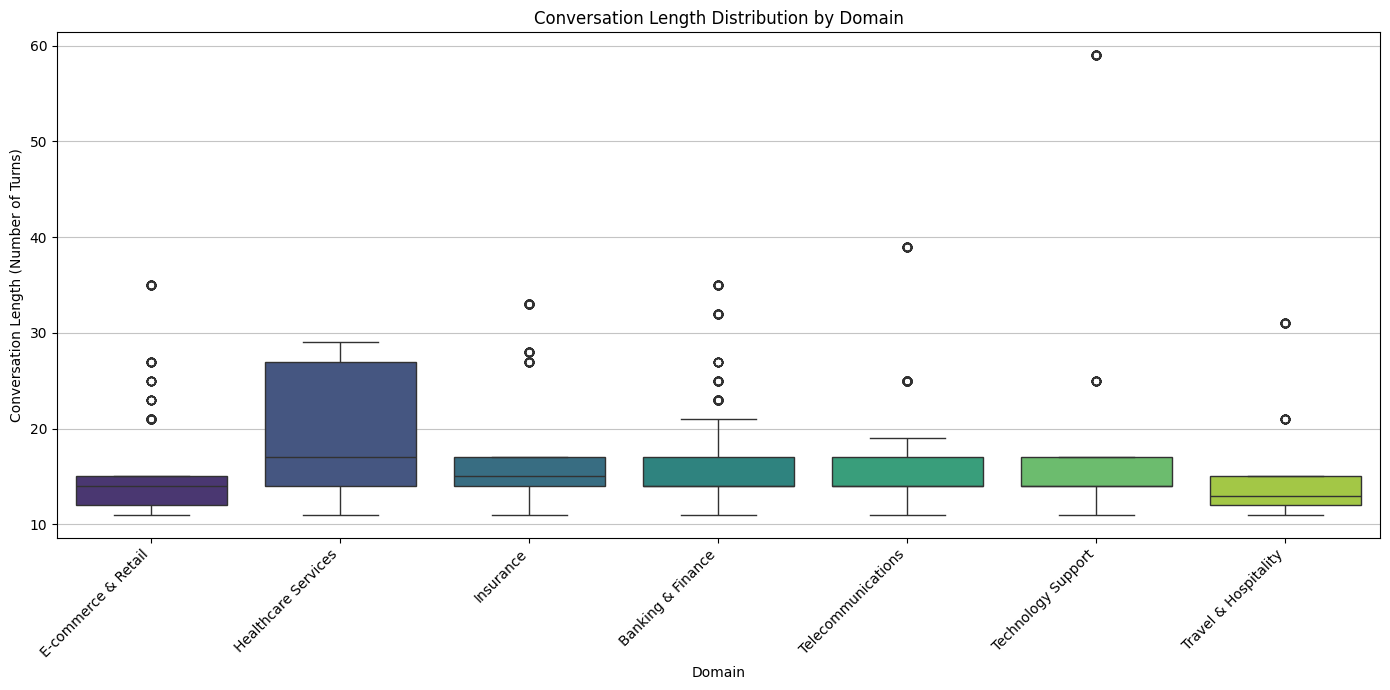

In [16]:
plt.figure(figsize=(14, 7))
sns.boxplot(x='domain', y='conversation_length', data=conversation_details, hue='domain', palette='viridis', legend=False)
plt.title('Conversation Length Distribution by Domain')
plt.xlabel('Domain')
plt.ylabel('Conversation Length (Number of Turns)')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

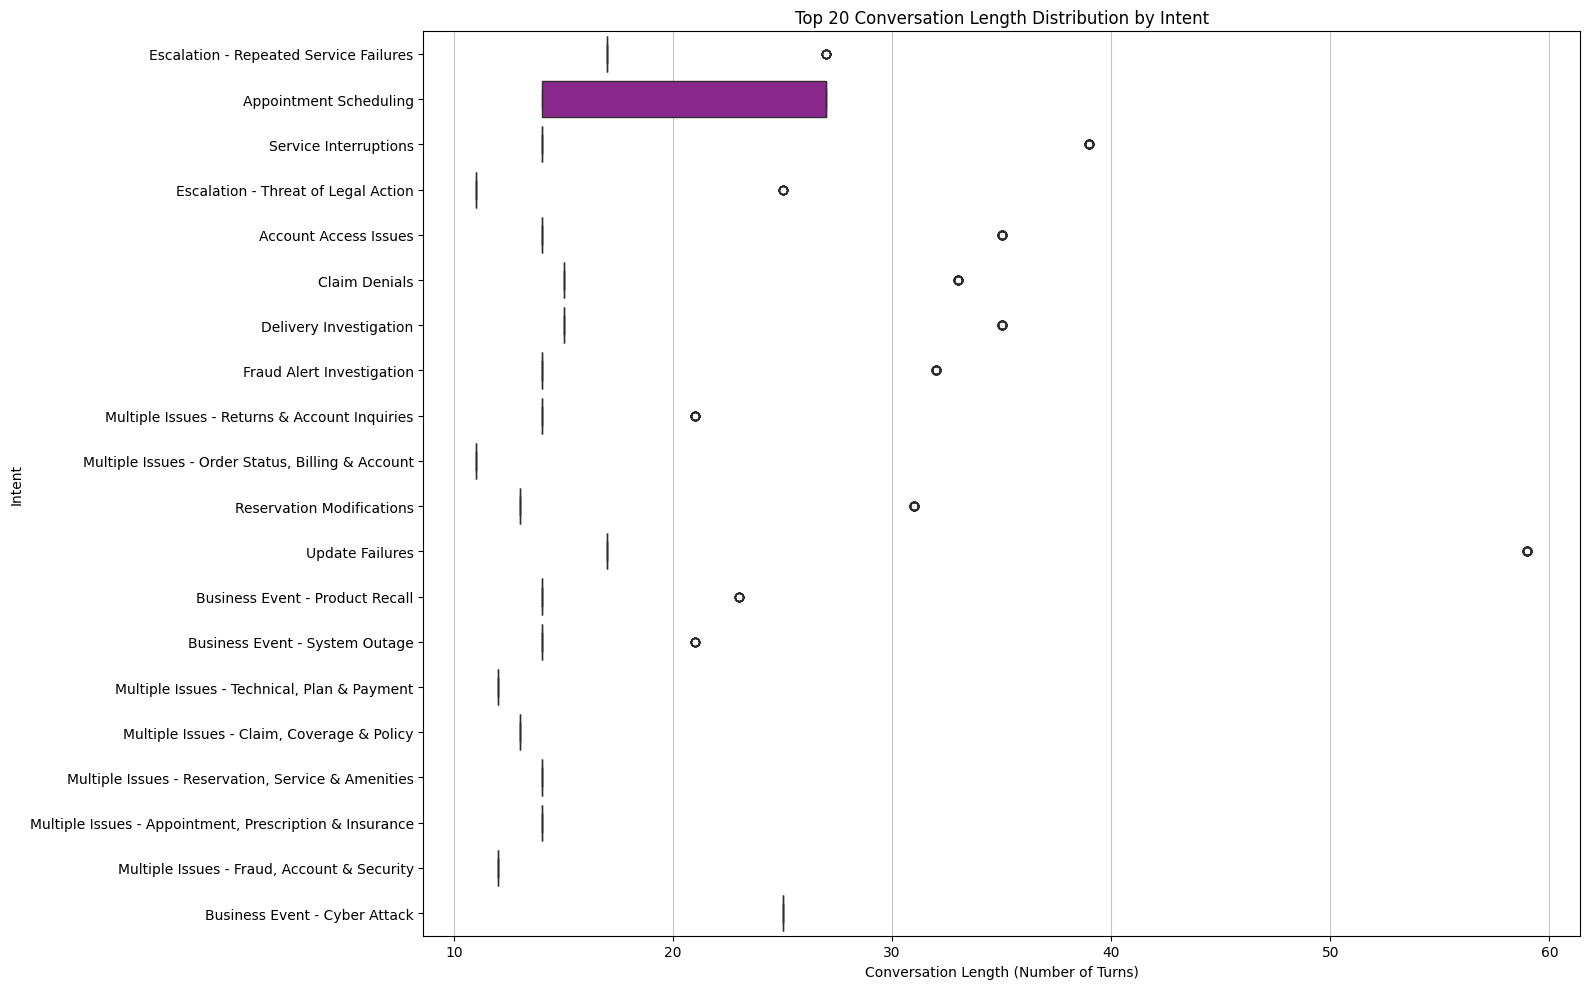

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Get the value counts for intent to determine top N intents
intent_counts = conversation_details['intent'].value_counts()

# Select the top 20 intents for plotting, or all if less than 20
if len(intent_counts) > 20:
    top_intents = intent_counts.head(20).index.tolist()
    # Filter conversation_details to include only the top intents
    filtered_conversation_details = conversation_details[conversation_details['intent'].isin(top_intents)]
    plt.figure(figsize=(16, 10))
    sns.boxplot(x='conversation_length', y='intent', data=filtered_conversation_details, order=top_intents, hue='intent', palette='plasma', legend=False)
    plt.title('Top 20 Conversation Length Distribution by Intent')
else:
    plt.figure(figsize=(16, 10))
    sns.boxplot(x='conversation_length', y='intent', data=conversation_details, order=intent_counts.index, hue='intent', palette='plasma', legend=False)
    plt.title('Conversation Length Distribution by Intent')

plt.xlabel('Conversation Length (Number of Turns)')
plt.ylabel('Intent')
plt.grid(axis='x', alpha=0.75)
plt.tight_layout()
plt.show()

/tmp/ipython-input-1446233406.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='hour_of_day', palette='viridis')


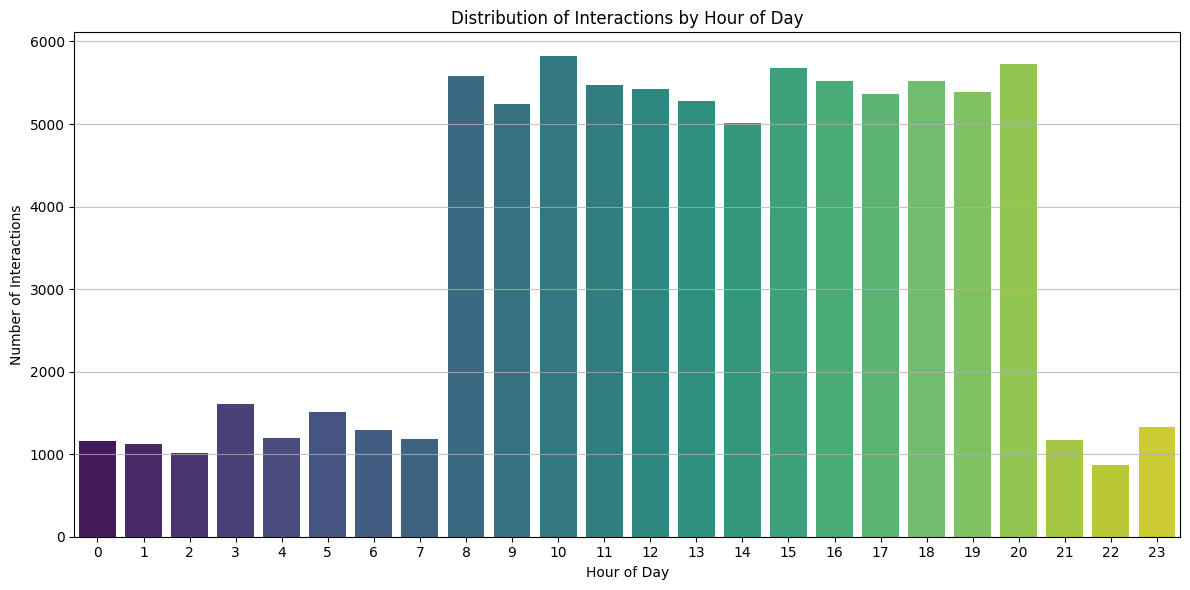

/tmp/ipython-input-1446233406.py:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='day_of_week', order=day_order, palette='magma')


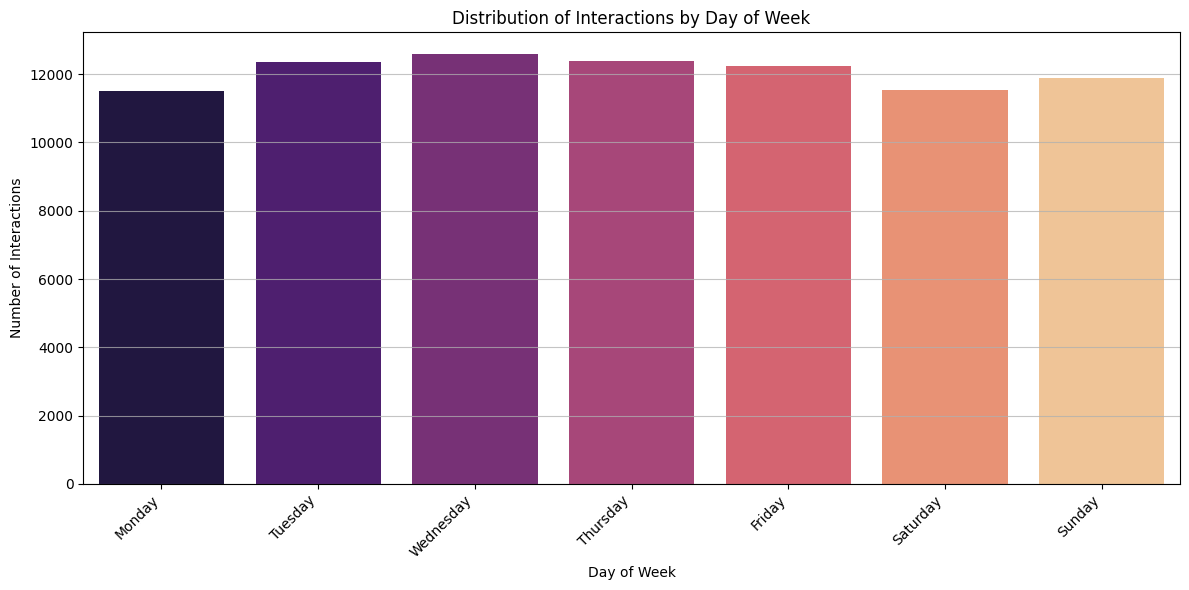

/tmp/ipython-input-1446233406.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=final_df, x='month', order=month_order, palette='cividis')


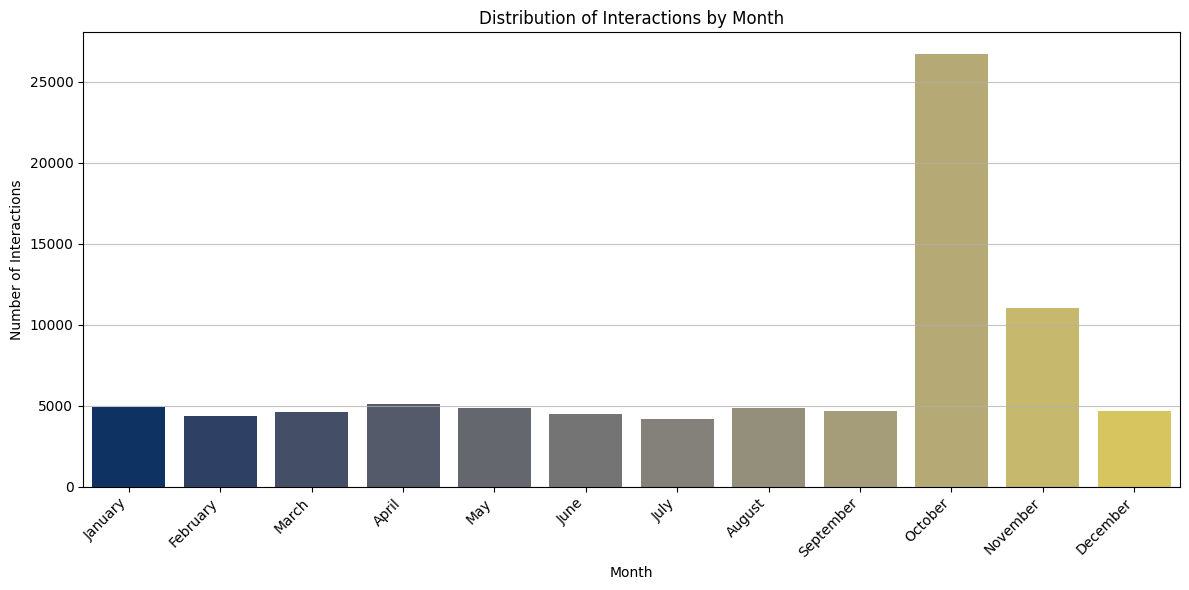

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas for ordered categories

# 1. Bar chart for 'hour_of_day' distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x='hour_of_day', palette='viridis')
plt.title('Distribution of Interactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Interactions')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 2. Bar chart for 'day_of_week' distribution
# Define a specific order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x='day_of_week', order=day_order, palette='magma')
plt.title('Distribution of Interactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 3. Bar chart for 'month' distribution
# Define a specific order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x='month', order=month_order, palette='cividis')
plt.title('Distribution of Interactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

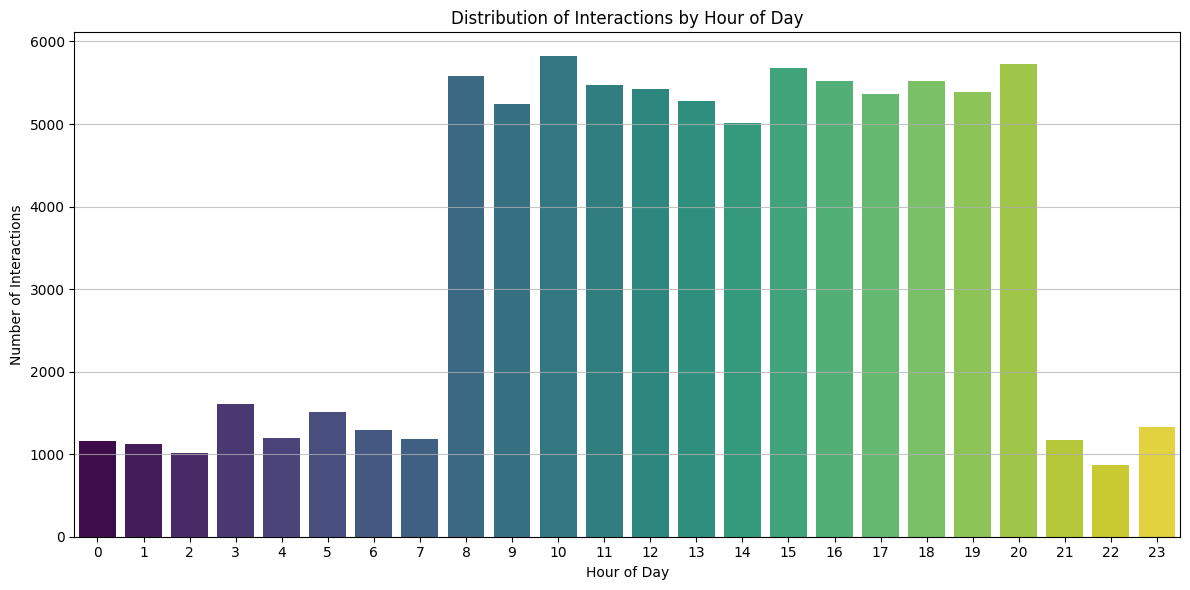

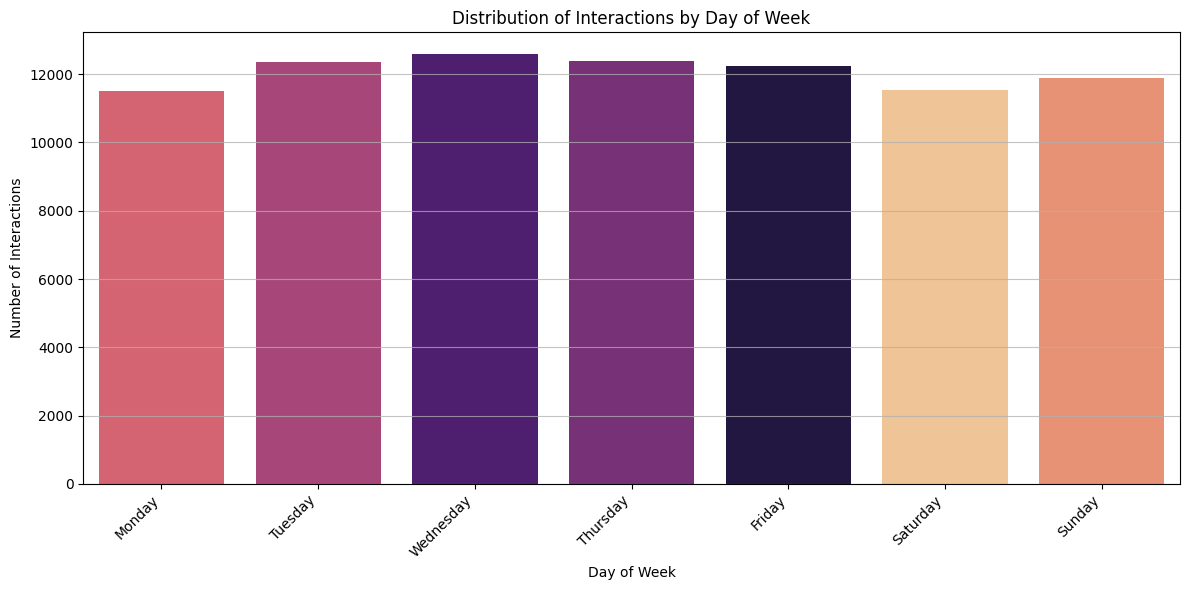

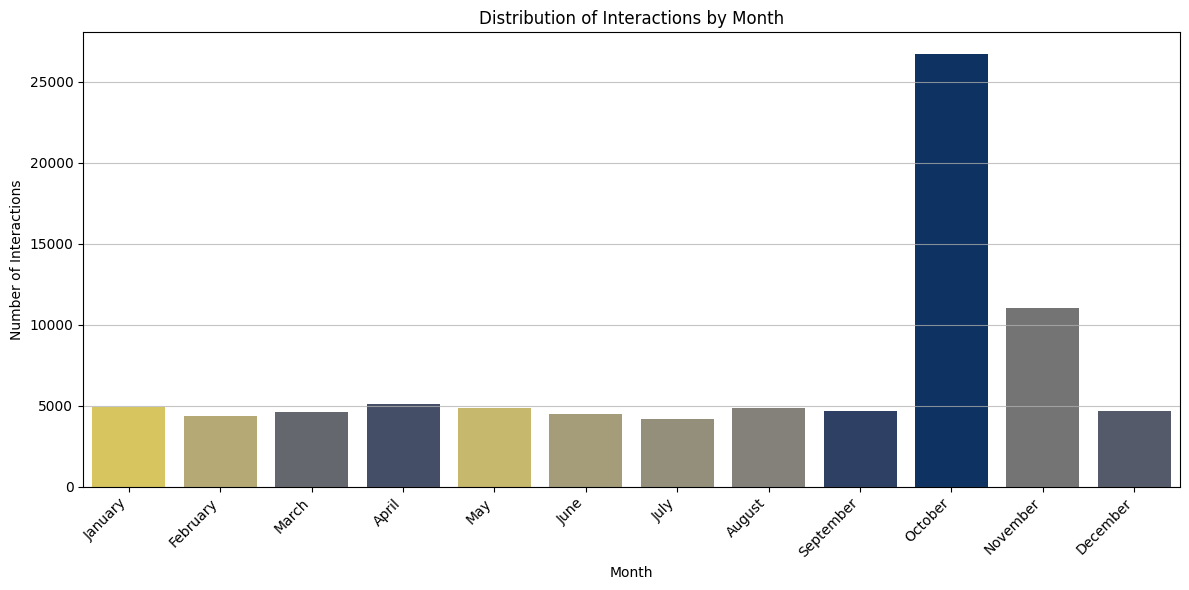

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd # Import pandas for ordered categories

# 1. Bar chart for 'hour_of_day' distribution
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x='hour_of_day', hue='hour_of_day', palette='viridis', legend=False)
plt.title('Distribution of Interactions by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Interactions')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 2. Bar chart for 'day_of_week' distribution
# Define a specific order for days of the week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x='day_of_week', order=day_order, hue='day_of_week', palette='magma', legend=False)
plt.title('Distribution of Interactions by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

# 3. Bar chart for 'month' distribution
# Define a specific order for months
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
plt.figure(figsize=(12, 6))
sns.countplot(data=final_df, x='month', order=month_order, hue='month', palette='cividis', legend=False)
plt.title('Distribution of Interactions by Month')
plt.xlabel('Month')
plt.ylabel('Number of Interactions')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.75)
plt.tight_layout()
plt.show()

In [20]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

# Download necessary NLTK data (run once)
nltk.download('punkt')

print("Necessary libraries imported and 'punkt' tokenizer downloaded.")

Necessary libraries imported and 'punkt' tokenizer downloaded.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!



Analyzing 'cleaned_text'...
Top 20 Unigrams (cleaned_text):
  im: 16793
  help: 12632
  thank: 12449
  let: 11307
  see: 9927
  account: 9015
  need: 7216
  right: 6929
  issue: 6825
  yes: 6590
  ive: 6475
  thats: 6070
  get: 5878
  time: 5490
  understand: 5267
  day: 4995
  system: 4796
  would: 4759
  number: 4701
  today: 4586


/tmp/ipython-input-3306627938.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette='viridis')


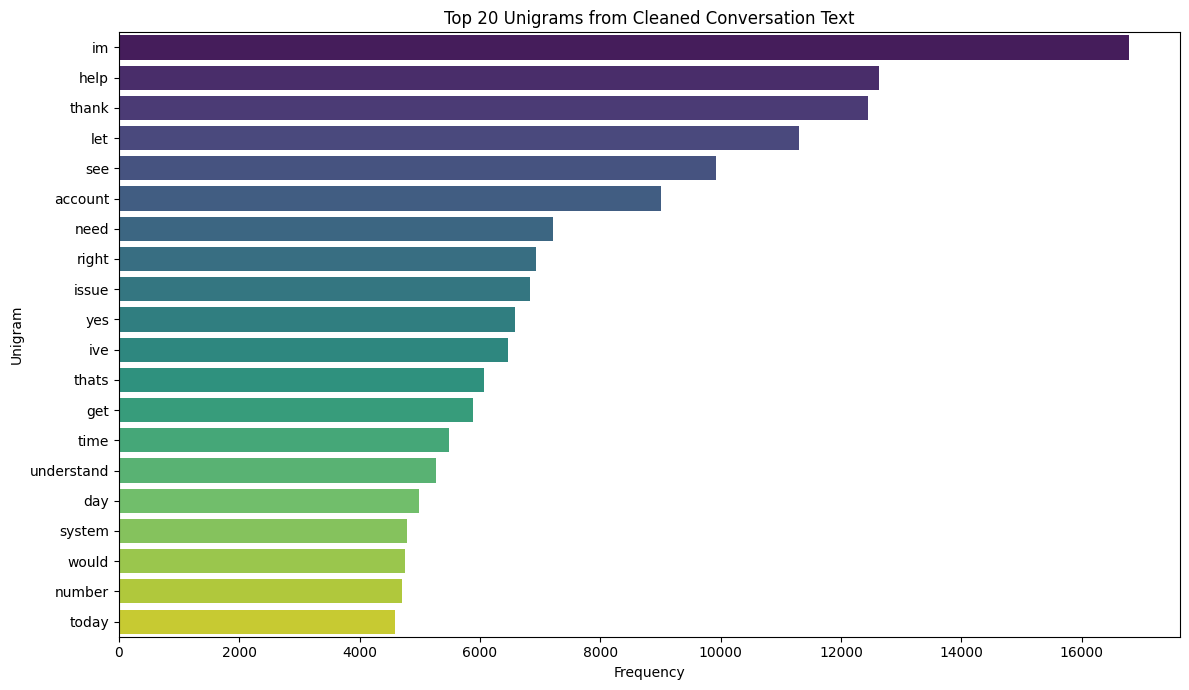


Top 20 Bigrams (cleaned_text):
  anything else: 3488
  let check: 3398
  thank calling: 3301
  im sorry: 3103
  let pull: 2444
  business day: 2424
  else help: 2298
  sorry hear: 2217
  youll receive: 2126
  completely understand: 2058
  right away: 1793
  understand frustration: 1555
  im also: 1539
  speak supervisor: 1500
  account number: 1312
  new card: 1298
  help today: 1295
  youre welcome: 1285
  would like: 1238
  thank see: 1177


/tmp/ipython-input-3306627938.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette='viridis')


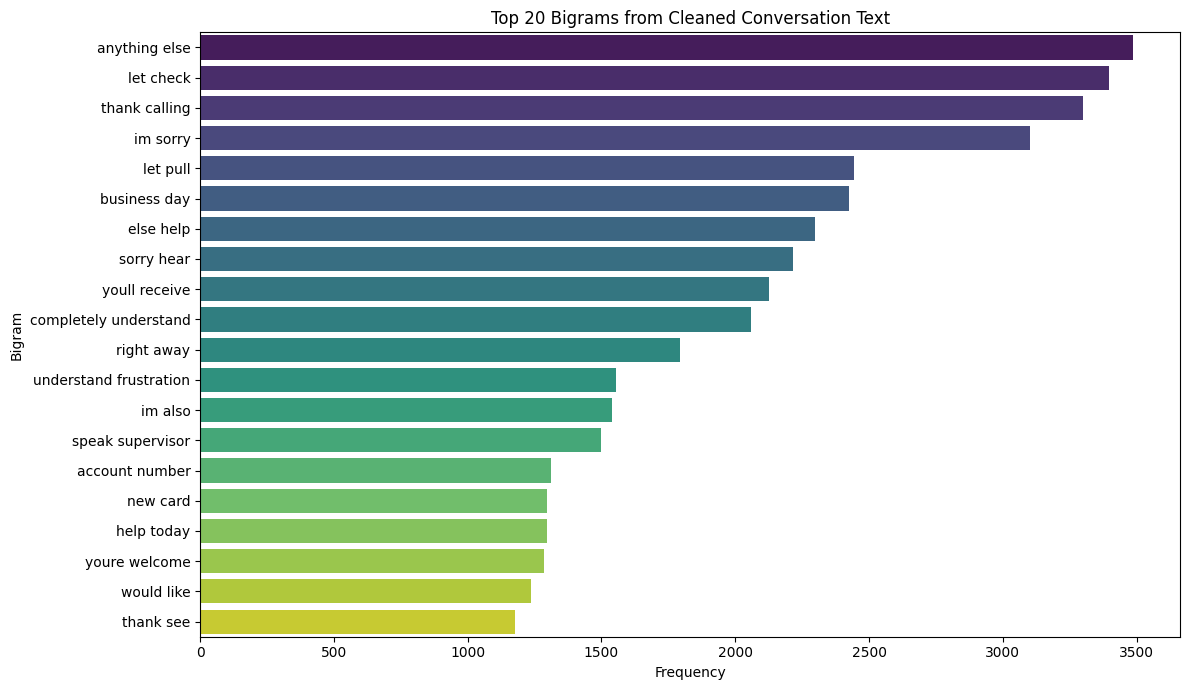


Analyzing 'cleaned_reason_for_call'...
Top 20 Unigrams (cleaned_reason_for_call):
  customer: 71129
  requiring: 40707
  due: 24814
  service: 22799
  issue: 18476
  experienced: 15734
  appointment: 15726
  multiple: 14815
  investigation: 13656
  resolution: 13592
  called: 12899
  reported: 12722
  system: 12548
  patient: 11984
  regarding: 10735
  recovery: 10237
  failed: 10170
  received: 9665
  experiencing: 9600
  hold: 9548


/tmp/ipython-input-3306627938.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette='viridis')


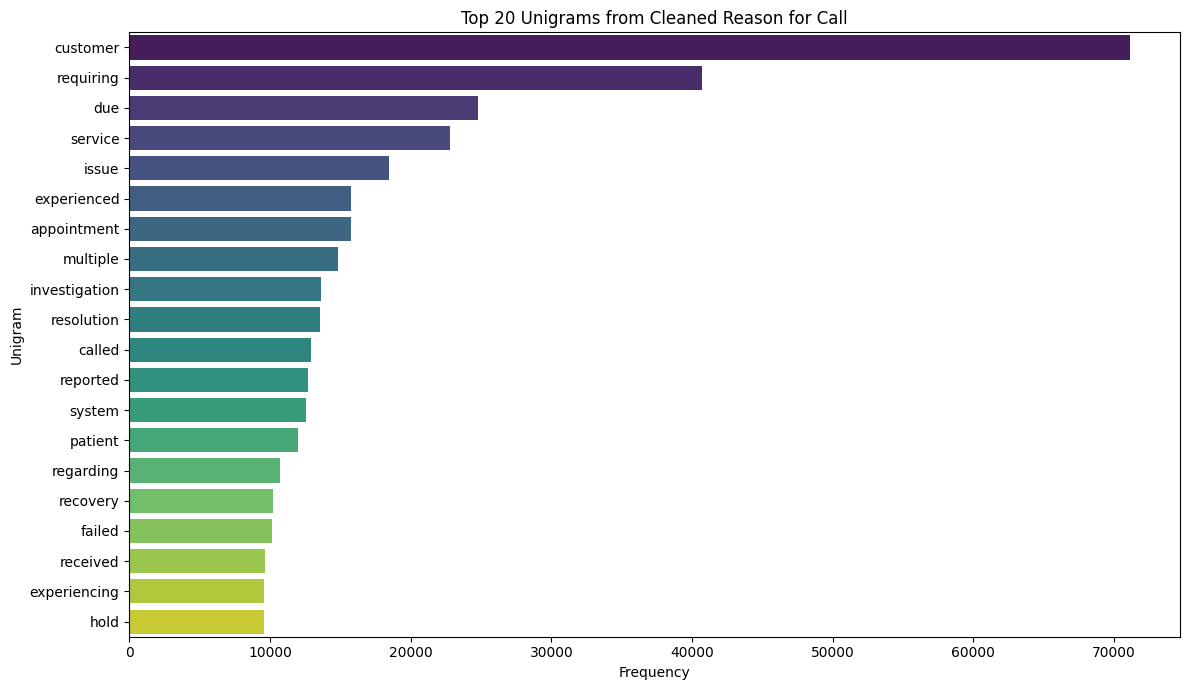


Top 20 Bigrams (cleaned_reason_for_call):
  service recovery: 10237
  multiple failed: 9480
  requiring immediate: 9158
  escalated supervisor: 8430
  supervisor experiencing: 8430
  experiencing multiple: 8430
  poor service: 8430
  recovery attempt: 8430
  called regarding: 8250
  arrived scheduled: 7101
  scheduled appointment: 7101
  appointment found: 7101
  found system: 7101
  system requiring: 7101
  immediate investigation: 7101
  investigation resolution: 7101
  resolution patient: 6900
  resolution customer: 6412
  week customer: 6321
  received requiring: 5385


/tmp/ipython-input-3306627938.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frequencies, y=words, palette='viridis')


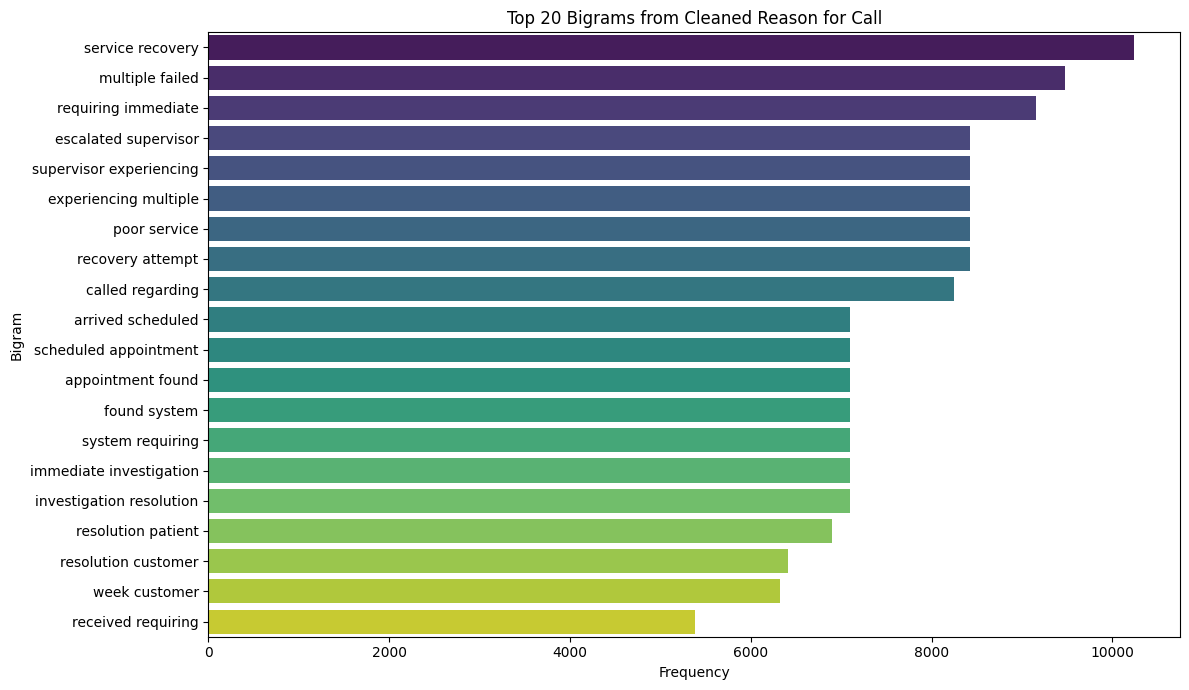

In [21]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_ngrams(text_series, n=1, top_n=20):
    """Calculates and returns the top_n most frequent n-grams from a pandas Series of text."""
    all_words = ' '.join(text_series.dropna()).split()
    n_grams = ngrams(all_words, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

def plot_ngrams(ngram_data, title, xlabel, ylabel):
    """Generates a bar chart for n-gram frequency distribution."""
    words = [" ".join(ngram) for ngram, freq in ngram_data]
    frequencies = [freq for ngram, freq in ngram_data]

    plt.figure(figsize=(12, 7))
    sns.barplot(x=frequencies, y=words, palette='viridis')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# --- Analyze 'cleaned_text' ---
print("\nAnalyzing 'cleaned_text'...")
# 1. Top 20 Unigrams from 'cleaned_text'
top_unigrams_text = get_top_ngrams(final_df['cleaned_text'], n=1, top_n=20)
print("Top 20 Unigrams (cleaned_text):")
for gram, freq in top_unigrams_text:
    print(f"  {' '.join(gram)}: {freq}")
plot_ngrams(top_unigrams_text, 'Top 20 Unigrams from Cleaned Conversation Text', 'Frequency', 'Unigram')

# 2. Top 20 Bigrams from 'cleaned_text'
top_bigrams_text = get_top_ngrams(final_df['cleaned_text'], n=2, top_n=20)
print("\nTop 20 Bigrams (cleaned_text):")
for gram, freq in top_bigrams_text:
    print(f"  {' '.join(gram)}: {freq}")
plot_ngrams(top_bigrams_text, 'Top 20 Bigrams from Cleaned Conversation Text', 'Frequency', 'Bigram')

# --- Analyze 'cleaned_reason_for_call' ---
print("\nAnalyzing 'cleaned_reason_for_call'...")
# 3. Top 20 Unigrams from 'cleaned_reason_for_call'
top_unigrams_reason = get_top_ngrams(final_df['cleaned_reason_for_call'], n=1, top_n=20)
print("Top 20 Unigrams (cleaned_reason_for_call):")
for gram, freq in top_unigrams_reason:
    print(f"  {' '.join(gram)}: {freq}")
plot_ngrams(top_unigrams_reason, 'Top 20 Unigrams from Cleaned Reason for Call', 'Frequency', 'Unigram')

# 4. Top 20 Bigrams from 'cleaned_reason_for_call'
top_bigrams_reason = get_top_ngrams(final_df['cleaned_reason_for_call'], n=2, top_n=20)
print("\nTop 20 Bigrams (cleaned_reason_for_call):")
for gram, freq in top_bigrams_reason:
    print(f"  {' '.join(gram)}: {freq}")
plot_ngrams(top_bigrams_reason, 'Top 20 Bigrams from Cleaned Reason for Call', 'Frequency', 'Bigram')


Analyzing 'cleaned_text'...
Top 20 Unigrams (cleaned_text):
  im: 16793
  help: 12632
  thank: 12449
  let: 11307
  see: 9927
  account: 9015
  need: 7216
  right: 6929
  issue: 6825
  yes: 6590
  ive: 6475
  thats: 6070
  get: 5878
  time: 5490
  understand: 5267
  day: 4995
  system: 4796
  would: 4759
  number: 4701
  today: 4586


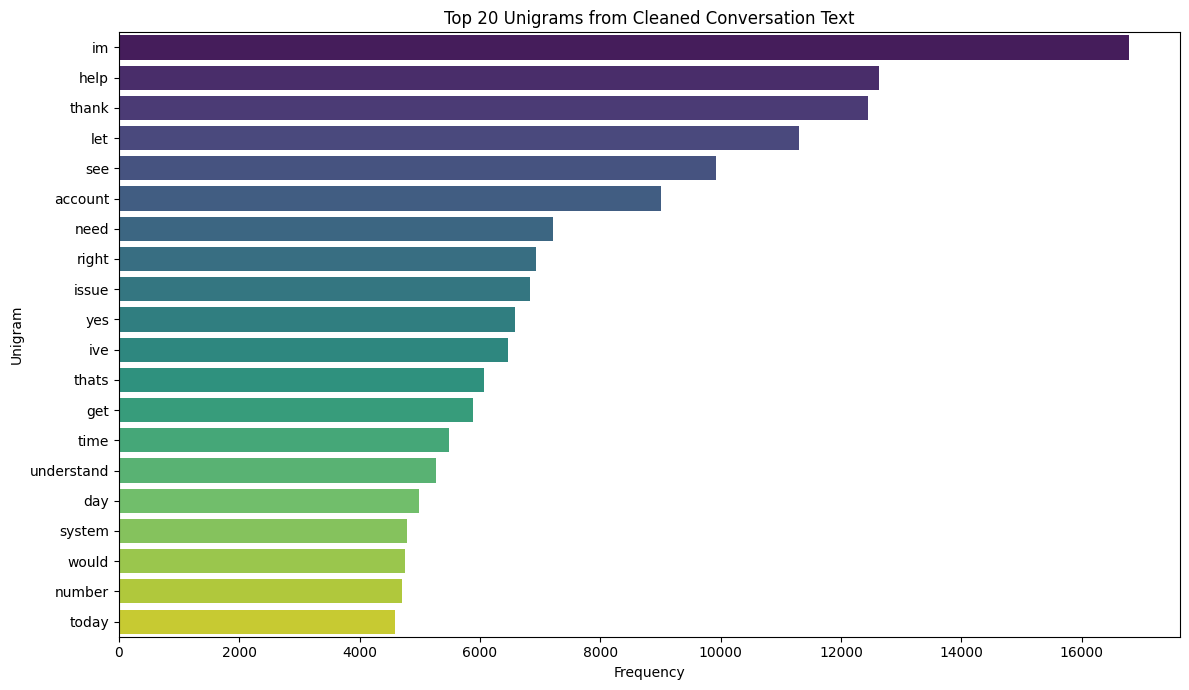


Top 20 Bigrams (cleaned_text):
  anything else: 3488
  let check: 3398
  thank calling: 3301
  im sorry: 3103
  let pull: 2444
  business day: 2424
  else help: 2298
  sorry hear: 2217
  youll receive: 2126
  completely understand: 2058
  right away: 1793
  understand frustration: 1555
  im also: 1539
  speak supervisor: 1500
  account number: 1312
  new card: 1298
  help today: 1295
  youre welcome: 1285
  would like: 1238
  thank see: 1177


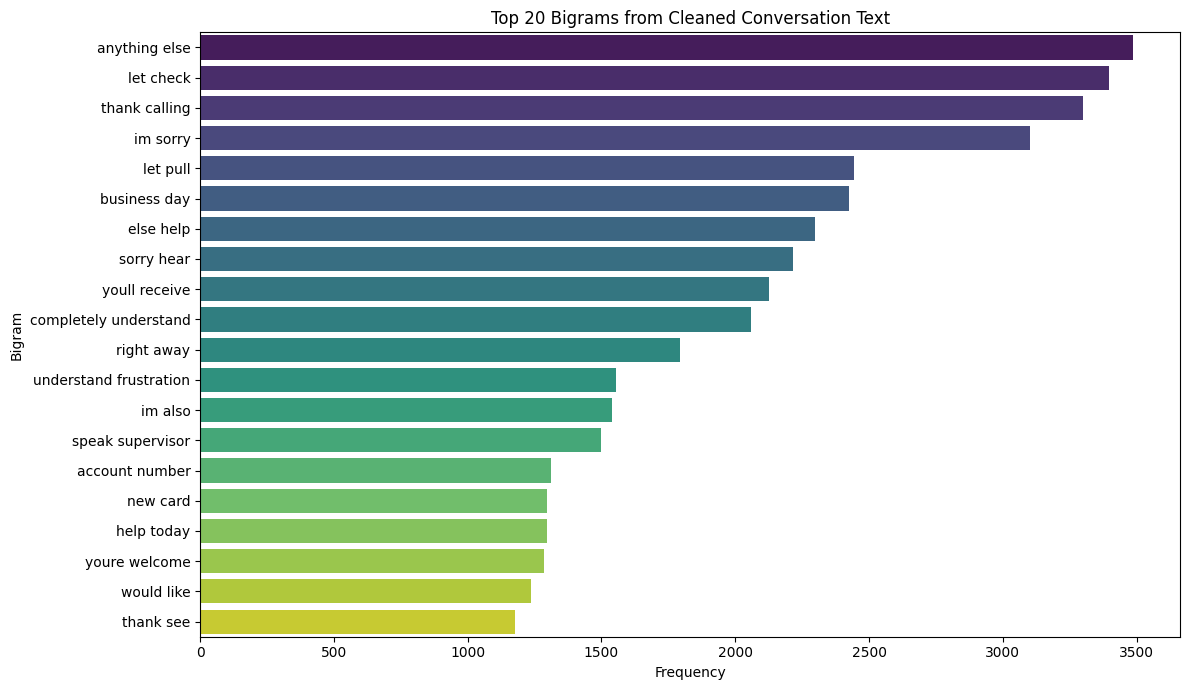


Analyzing 'cleaned_reason_for_call'...
Top 20 Unigrams (cleaned_reason_for_call):
  customer: 71129
  requiring: 40707
  due: 24814
  service: 22799
  issue: 18476
  experienced: 15734
  appointment: 15726
  multiple: 14815
  investigation: 13656
  resolution: 13592
  called: 12899
  reported: 12722
  system: 12548
  patient: 11984
  regarding: 10735
  recovery: 10237
  failed: 10170
  received: 9665
  experiencing: 9600
  hold: 9548


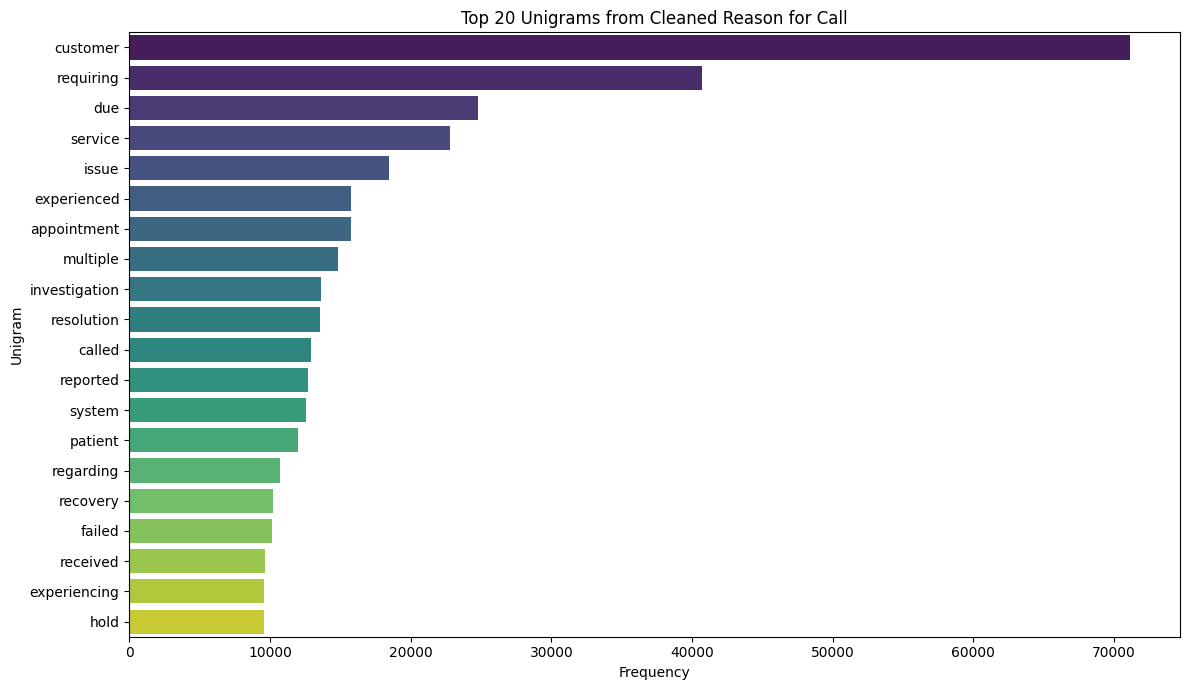


Top 20 Bigrams (cleaned_reason_for_call):
  service recovery: 10237
  multiple failed: 9480
  requiring immediate: 9158
  escalated supervisor: 8430
  supervisor experiencing: 8430
  experiencing multiple: 8430
  poor service: 8430
  recovery attempt: 8430
  called regarding: 8250
  arrived scheduled: 7101
  scheduled appointment: 7101
  appointment found: 7101
  found system: 7101
  system requiring: 7101
  immediate investigation: 7101
  investigation resolution: 7101
  resolution patient: 6900
  resolution customer: 6412
  week customer: 6321
  received requiring: 5385


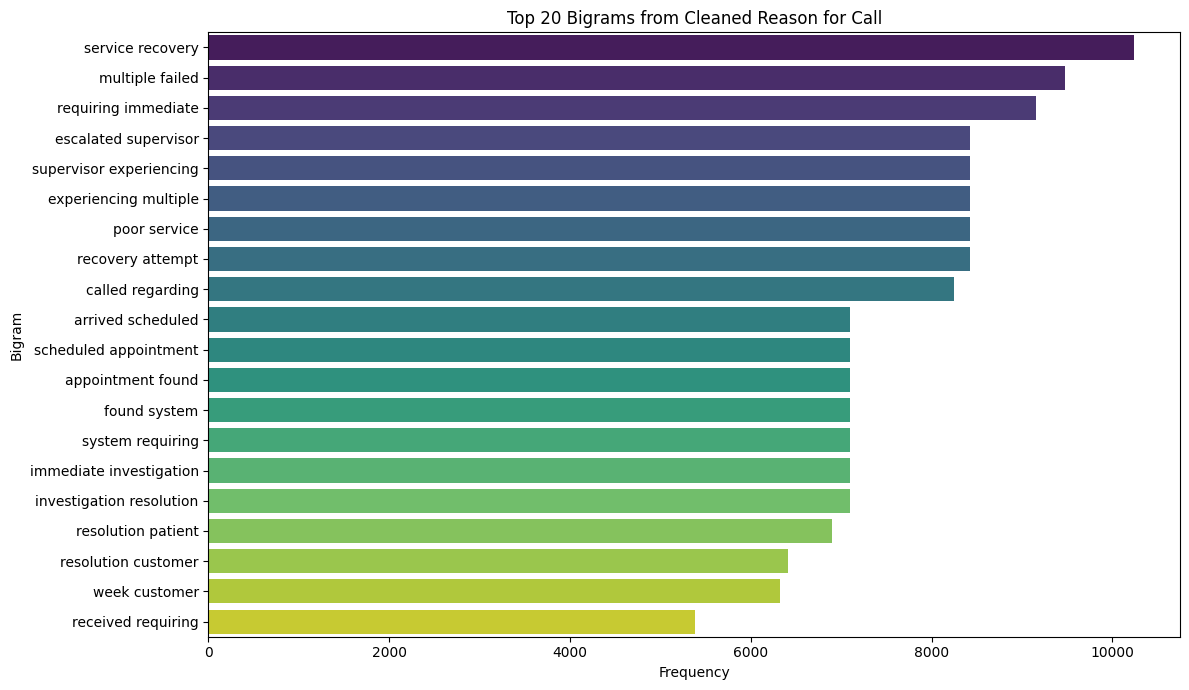

In [22]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.util import ngrams
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

def get_top_ngrams(text_series, n=1, top_n=20):
    """Calculates and returns the top_n most frequent n-grams from a pandas Series of text."""
    all_words = ' '.join(text_series.dropna()).split()
    n_grams = ngrams(all_words, n)
    freq_dist = Counter(n_grams)
    return freq_dist.most_common(top_n)

def plot_ngrams(ngram_data, title, xlabel, ylabel):
    """Generates a bar chart for n-gram frequency distribution."""
    words = [" ".join(ngram) for ngram, freq in ngram_data]
    frequencies = [freq for ngram, freq in ngram_data]

    plt.figure(figsize=(12, 7))
    sns.barplot(x=frequencies, y=words, hue=words, palette='viridis', legend=False)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.tight_layout()
    plt.show()

# --- Analyze 'cleaned_text' ---
print("\nAnalyzing 'cleaned_text'...")
# 1. Top 20 Unigrams from 'cleaned_text'
top_unigrams_text = get_top_ngrams(final_df['cleaned_text'], n=1, top_n=20)
print("Top 20 Unigrams (cleaned_text):")
for gram, freq in top_unigrams_text:
    print(f"  {' '.join(gram)}: {freq}")
plot_ngrams(top_unigrams_text, 'Top 20 Unigrams from Cleaned Conversation Text', 'Frequency', 'Unigram')

# 2. Top 20 Bigrams from 'cleaned_text'
top_bigrams_text = get_top_ngrams(final_df['cleaned_text'], n=2, top_n=20)
print("\nTop 20 Bigrams (cleaned_text):")
for gram, freq in top_bigrams_text:
    print(f"  {' '.join(gram)}: {freq}")
plot_ngrams(top_bigrams_text, 'Top 20 Bigrams from Cleaned Conversation Text', 'Frequency', 'Bigram')

# --- Analyze 'cleaned_reason_for_call' ---
print("\nAnalyzing 'cleaned_reason_for_call'...")
# 3. Top 20 Unigrams from 'cleaned_reason_for_call'
top_unigrams_reason = get_top_ngrams(final_df['cleaned_reason_for_call'], n=1, top_n=20)
print("Top 20 Unigrams (cleaned_reason_for_call):")
for gram, freq in top_unigrams_reason:
    print(f"  {' '.join(gram)}: {freq}")
plot_ngrams(top_unigrams_reason, 'Top 20 Unigrams from Cleaned Reason for Call', 'Frequency', 'Unigram')

# 4. Top 20 Bigrams from 'cleaned_reason_for_call'
top_bigrams_reason = get_top_ngrams(final_df['cleaned_reason_for_call'], n=2, top_n=20)
print("\nTop 20 Bigrams (cleaned_reason_for_call):")
for gram, freq in top_bigrams_reason:
    print(f"  {' '.join(gram)}: {freq}")
plot_ngrams(top_bigrams_reason, 'Top 20 Bigrams from Cleaned Reason for Call', 'Frequency', 'Bigram')


In [23]:
speaker_turns_per_conversation = final_df.groupby(['transcript_id', 'speaker']).size().unstack(fill_value=0)
speaker_turns_per_conversation = speaker_turns_per_conversation.reset_index()
speaker_turns_per_conversation.rename(columns={'Agent': 'agent_turns', 'Customer': 'customer_turns'}, inplace=True)

print("Number of turns per speaker per conversation:")
print(speaker_turns_per_conversation.head())

Number of turns per speaker per conversation:
speaker        transcript_id  agent_turns  customer_turns
0        1000-8984-6825-7212           14              13
1        1001-3746-6274-6038            7               6
2        1001-7216-4497-4194            7               7
3        1001-9485-7397-7322            8               7
4        1003-4261-3861-9920           14              13


Average agent turns per conversation: 8.64
Average customer turns per conversation: 8.13


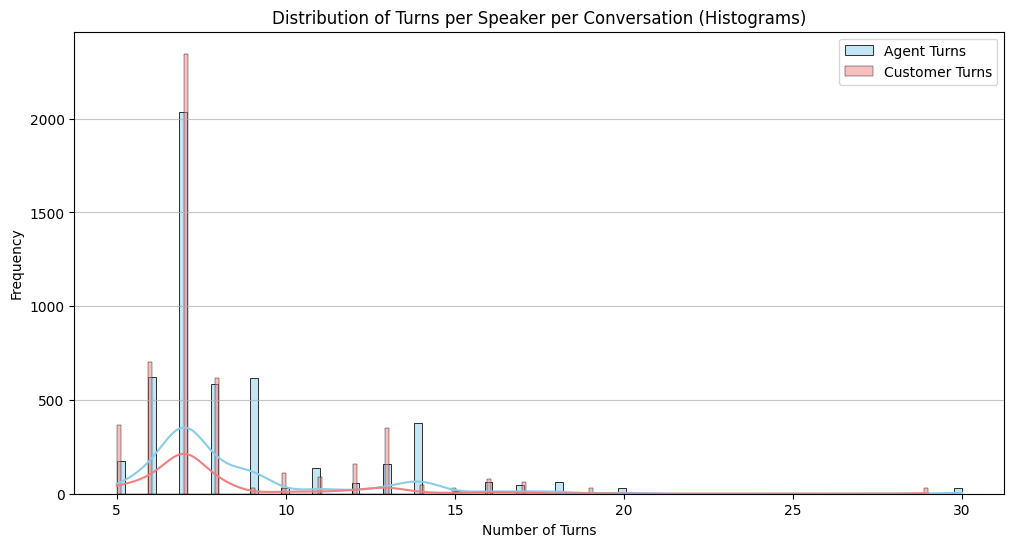

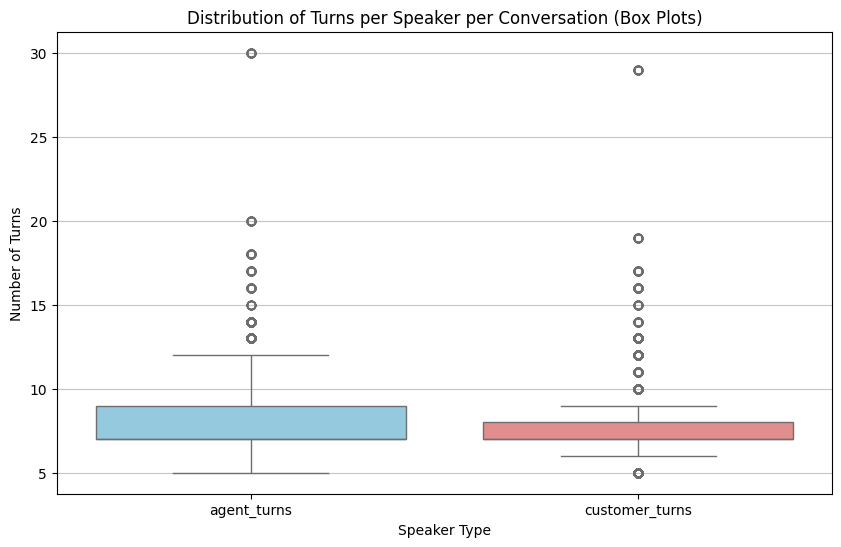

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the average number of turns for Agent and Customer speakers
avg_agent_turns = speaker_turns_per_conversation['agent_turns'].mean()
avg_customer_turns = speaker_turns_per_conversation['customer_turns'].mean()

print(f"Average agent turns per conversation: {avg_agent_turns:.2f}")
print(f"Average customer turns per conversation: {avg_customer_turns:.2f}")

# Visualize the distribution of turns per speaker per conversation using histograms
plt.figure(figsize=(12, 6))
sns.histplot(speaker_turns_per_conversation['agent_turns'], color='skyblue', label='Agent Turns', kde=True)
sns.histplot(speaker_turns_per_conversation['customer_turns'], color='lightcoral', label='Customer Turns', kde=True)
plt.title('Distribution of Turns per Speaker per Conversation (Histograms)')
plt.xlabel('Number of Turns')
plt.ylabel('Frequency')
plt.legend()
plt.grid(axis='y', alpha=0.75)
plt.show()

# Visualize the distribution of turns per speaker per conversation using box plots
plt.figure(figsize=(10, 6))
sns.boxplot(data=speaker_turns_per_conversation[['agent_turns', 'customer_turns']], palette={'agent_turns': 'skyblue', 'customer_turns': 'lightcoral'})
plt.title('Distribution of Turns per Speaker per Conversation (Box Plots)')
plt.xlabel('Speaker Type')
plt.ylabel('Number of Turns')
plt.grid(axis='y', alpha=0.75)
plt.show()

## **Summary of EDA Findings**

### Domain and Intent Distribution
The data is heavily skewed towards certain domains and intents. **Healthcare Services** and **E-commerce & Retail** are the most prevalent domains, while **Appointment Scheduling**, **Escalation – Repeated Service Failures**, and **Service Interruptions** are the most frequent intents. This indicates a strong focus on specific business areas and recurring customer needs.

### Conversation Lengths
Most conversations are relatively short, peaking at a low number of turns, but there is a long tail indicating some significantly longer interactions. Conversation length varies by domain and intent, suggesting that certain issue types inherently require more extensive discussion.

### Speaker Behavior – Text Lengths
Agents consistently produce longer messages (average **135.49 characters**) compared to customers (average **74.64 characters**). This implies that agents are providing more detailed responses, explanations, or are required to use more text to gather information and resolve issues.

### Speaker Behavior – Turn-Taking
Agents take a slightly higher number of turns per conversation (average **8.64**) than customers (average **8.13**), indicating a balanced but agent-led conversational flow.

### Reasons for Call
Qualitative analysis of `reason_for_call` reveals a wide range of issues, including technical problems, delivery investigations, fraud alerts, claim denials, and legal threats. Common keywords such as *customer*, *requiring*, *service*, and *issue* reflect the problem-oriented nature of the interactions.

### Temporal Patterns
Customer interactions show clear temporal patterns across hours of the day, days of the week, and months. Distinct peak times are evident, providing actionable insights for staffing, scheduling, and resource allocation.

### Top Keywords / N-grams
Recurring terms in `cleaned_text`—such as *help*, *thank*, *let check*, and *anything else*—highlight typical conversational mechanics. In `cleaned_reason_for_call`, phrases like *service recovery*, *multiple failed*, *escalated supervisor*, and *requiring immediate investigation* are prominent, pointing to recurring and specific problem types.

---

## Potential Problems or Areas for Concern in the Data

### High Volume of Escalations and Service Failures
The **Escalation – Repeated Service Failures** intent appears with high frequency, and keywords such as *multiple failed*, *poor service*, and *escalated supervisor* are common. This strongly suggests systemic issues in service delivery or resolution processes, leading to repeated customer contact and escalations. These patterns indicate potential customer dissatisfaction and operational inefficiency.

### Disparity in Text Lengths
Although detailed agent responses can be beneficial, the substantial difference in average text length—agents writing nearly twice as much as customers—may indicate:
- Over-explanation by agents  
- Difficulty obtaining concise information from customers  
- Increased typing due to complex workflows or systems  

This disparity warrants further investigation into call efficiency, tooling, and agent training.

### High Frequency of Critical Issues
The prevalence of **Fraud Alert Investigation** and interactions involving **legal action threats** suggests that critical and high-stakes issues occur frequently. This highlights the need for strong fraud prevention mechanisms, clear communication strategies, and efficient escalation and resolution processes.

### Imbalanced Domain and Intent Distribution
The skewed distribution of domains and intents presents challenges for downstream machine learning applications. Minority classes may be underrepresented, requiring techniques such as re-sampling or class weighting to ensure fair and accurate model performance. While not a data quality issue per se, it is an important consideration for advanced analytics and automation.

---

### Overall Insight
Collectively, the data points to significant operational challenges related to **service reliability** and **customer satisfaction**, particularly around repeated service failures and the handling of complex or critical issues. Addressing these areas could lead to measurable improvements in efficiency, customer experience, and system robustness.
